In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
df = pd.read_csv(r"data_understanding_output.csv",skipinitialspace=True)

In [5]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

word    object
PoS     object
dtype: object

In [6]:
df_train = df.drop(['word','PoS', 'polysemy'], axis=1)
df_train.dtypes

length                             int64
arousal                          float64
valence                          float64
dominance                        float64
concreteness                     float64
imageability                     float64
familiarity                      float64
aoa                              float64
semsize                          float64
gender                           float64
log_freq                         float64
number_of_meanings                 int64
avg_variance_between_meanings    float64
sentiment                        float64
dtype: object

In [7]:
df_train.columns

Index(['length', 'arousal', 'valence', 'dominance', 'concreteness',
       'imageability', 'familiarity', 'aoa', 'semsize', 'gender', 'log_freq',
       'number_of_meanings', 'avg_variance_between_meanings', 'sentiment'],
      dtype='object')

In [8]:
from sklearn import preprocessing

In [12]:
import warnings
warnings.filterwarnings('ignore')


In [17]:
cols = [col for col in df_train.columns]
X = df[cols].values

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

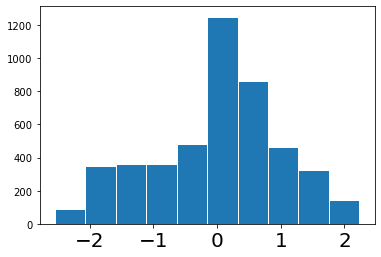

In [20]:
plt.hist(X_scal[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

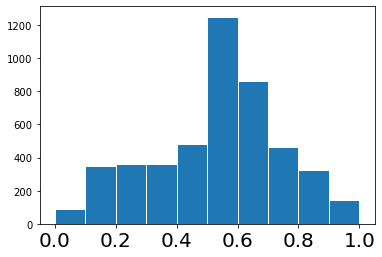

In [21]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

plt.hist(X_minmax[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

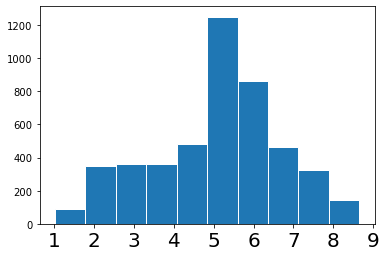

In [22]:
plt.hist(X[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

In [121]:
kmeans = KMeans( n_clusters=4, n_init=10, max_iter=200 )
kmeans.fit(X_minmax)

KMeans(max_iter=200, n_clusters=4)

In [122]:
kmeans.labels_

array([2, 2, 3, ..., 2, 1, 2], dtype=int32)

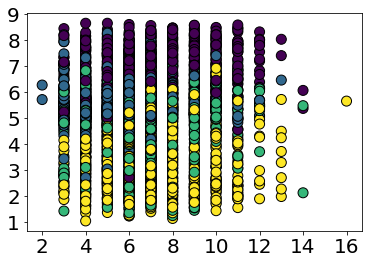

In [123]:
plt.scatter( X[:,0], X[:,2], s=100, edgecolor='black', c= kmeans.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [124]:
kmeans.cluster_centers_

array([[0.34353741, 0.56547766, 0.73788144, 0.61082625, 0.32299226,
        0.37953009, 0.75798354, 0.51773515, 0.61790136, 0.45724611,
        0.59210732, 0.02731357, 0.0152793 , 0.64061096],
       [0.25238819, 0.39896113, 0.59552062, 0.5130926 , 0.82934223,
        0.85721966, 0.79482306, 0.293953  , 0.39018089, 0.48911341,
        0.56486112, 0.07887538, 0.04935746, 0.50303951],
       [0.31658768, 0.36449633, 0.46561875, 0.44638712, 0.72316214,
        0.70134621, 0.55971206, 0.61578186, 0.46990834, 0.58786727,
        0.44817759, 0.02388626, 0.01556419, 0.48909953],
       [0.33865967, 0.38922919, 0.33174268, 0.36236509, 0.311999  ,
        0.3306008 , 0.60638116, 0.64080767, 0.53259074, 0.54919996,
        0.44839474, 0.01235392, 0.00690767, 0.36853088]])

In [125]:
centers = kmeans.cluster_centers_

In [126]:
centers = scaler.inverse_transform(centers)

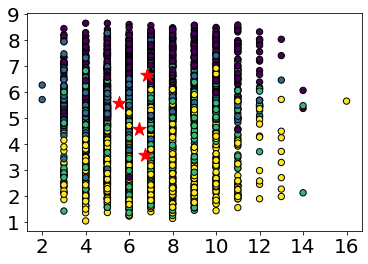

In [127]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,2], c='red', marker='*', s=200 )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

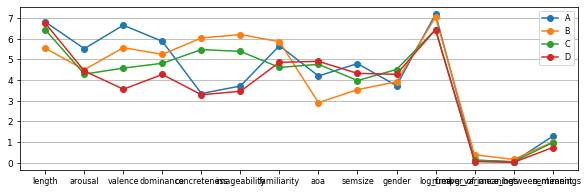

In [128]:
plt.figure(figsize=(10, 3))

clust_name = ['A', 'B', 'C','D']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(cols)), cols, fontsize=8)
plt.yticks(fontsize=9)

plt.legend(fontsize=8, loc='best')
plt.grid(axis='y')

[]

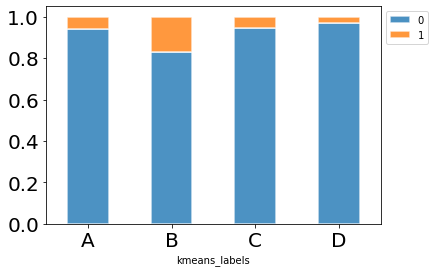

In [129]:
df['kmeans_labels'] = kmeans.labels_

bar_pl = df['polysemy'].groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [130]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([1113, 1318, 1054, 1197]))

In [131]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 1322.1819995804772
Silhouette 0.16350687374556752


In [ ]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append( kmeans.inertia_ )

In [ ]:
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()